In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

https://github.com/anwarcsebd/machine-learning-coursera/blob/master/notebooks/ex1-Linear%20Regression.ipynb

In [5]:
data = pd.read_csv('ex1data1.txt', names = ["population", "profit"]) # read comma separated data
x = data.iloc[:, 0] #Read from first column
y = data.iloc[:, 1] #Read from second column
m = len(y) # number of training examples
data.head() # view first few rows of the data

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.describe() # some descriptive statitics

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


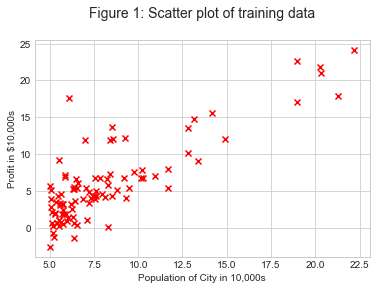

In [7]:
#create a scatter plot of the data.
plt.scatter(x, y, c='r', marker='x', linewidths=1)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title("Figure 1: Scatter plot of training data\n", fontsize = 14)
plt.show()

In [8]:
x = x[:, np.newaxis] # make x as column vector by inserting an axis
y = y[:, np.newaxis] # make y as column vector by inserting an axis
theta = np.zeros([2,1]) # initialize fitting parameters
iterations = 1500
alpha = 0.01
ones = np.ones((m, 1))
x = np.hstack((ones, x)) # adding the intercept term, Add a column of ones to x

In [9]:
def computeCost(x, y, theta):
    exp = np.dot(x, theta) -y
    return np.sum(np.power(exp, 2)) / (2*m)
J = computeCost(x, y, theta)
print(J)

32.072733877455676


In [10]:
def gradientDescent(x, y, theta, alpha, iterations):
    for i in range(iterations):
        exp = np.dot(x, theta) - y
        exp = np.dot(x.T, exp)
        theta = theta - (alpha/m)*exp
    return theta
theta = gradientDescent(x, y, theta, alpha, iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


In [11]:
J = computeCost(x, y, theta)
print(J) #cost function after applying gradient descent

4.483388256587726


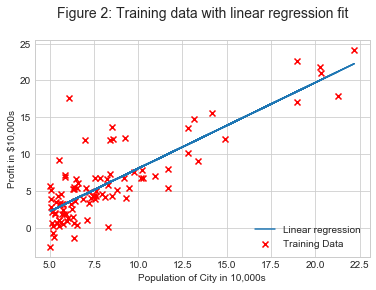

In [12]:

plt.scatter(x[:,1], y,  c='r', marker='x', linewidths=1, label='Training Data')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(x[:,1], np.dot(x, theta), label='Linear regression')
plt.title("Figure 2: Training data with linear regression fit\n", fontsize = 14)
plt.legend(loc = 4)
plt.show()

In [13]:
predict1 = np.dot(theta.T, [1, 3.5])*10000
predict2 = np.dot(theta.T, [1, 7])*10000
print('profit for a city with population of 35000:', predict1)
print('profit for a city with population of 70000:', predict2)

profit for a city with population of 35000: [4519.7678677]
profit for a city with population of 70000: [45342.45012945]


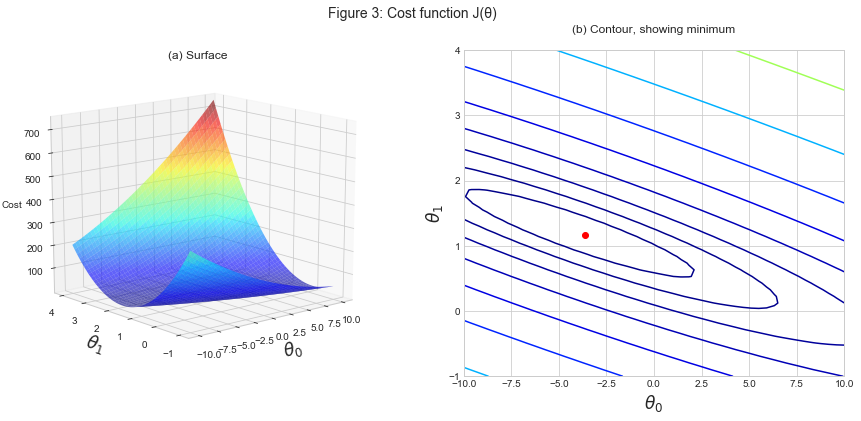

In [14]:
#importing 3d plot
from mpl_toolkits.mplot3d import axes3d

# Create grid coordinates for plotting
xx = x[:,1]
yy = np.dot(x, theta)

B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
z = np.zeros((B0.size,B1.size))
# Calculate J-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(z):
    z[i,j] = computeCost(x,y, theta=[[xx[i,j]], [yy[i,j]]])
    
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# Left plot
surface_plot = ax1.plot_surface(xx, yy, z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax1.set_zlabel('Cost')
ax1.set_zlim(z.min(),z.max())
ax1.view_init(elev=15, azim=230)
ax1.set_title("(a) Surface\n")

# Right plot
contour_plot = ax2.contour(xx, yy, z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax2.scatter(theta[0],theta[1], c='r')
ax2.set_title("(b) Contour, showing minimum\n")


# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)
fig.suptitle("Figure 3: Cost function J(θ)\n", fontsize=14)
plt.show()

In [16]:
data = pd.read_csv("ex1data2.txt", names = ["size", "bedrooms", "price"])
X = data.iloc[:, 0:2] # read first 2 columns into X
y = data.iloc[:, 2] # read the 3rd column into y
m = len(y) # no. of training samples
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [17]:
data.describe() # some descriptive stats

,size,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [18]:
X = (X - np.mean(X)) / np.std(X)

In [19]:

X.head()

,size,bedrooms
0,0.131415,-0.226093
1,-0.509641,-0.226093
2,0.507909,-0.226093
3,-0.743677,-1.554392
4,1.271071,1.102205


In [20]:
ones = np.ones((m,1))
X = np.hstack((ones, X)) # adding intercept terms, add a column of ones to X
y = y[:, np.newaxis] # make y as column vector
alpha = 0.01
num_iters = 400
theta = np.zeros((3,1)) # initialize fitting parameters, in this case we have 3 parameters.

In [21]:
X

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

In [22]:
y

array([[399900],
       [329900],
       [369000],
       [232000],
       [539900],
       [299900],
       [314900],
       [198999],
       [212000],
       [242500],
       [239999],
       [347000],
       [329999],
       [699900],
       [259900],
       [449900],
       [299900],
       [199900],
       [499998],
       [599000],
       [252900],
       [255000],
       [242900],
       [259900],
       [573900],
       [249900],
       [464500],
       [469000],
       [475000],
       [299900],
       [349900],
       [169900],
       [314900],
       [579900],
       [285900],
       [249900],
       [229900],
       [345000],
       [549000],
       [287000],
       [368500],
       [329900],
       [314000],
       [299000],
       [179900],
       [299900],
       [239500]], dtype=int64)

In [23]:
def computeCostMulti(X, y, theta):
    exp = np.dot(X, theta) - y
    return np.sum(np.power(exp, 2)) / (2*m)
J = computeCostMulti(X, y, theta)
print(J)

65591548106.45744


In [24]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)
    for i in range(num_iters):
        exp = np.dot(X, theta) - y
        exp = np.dot(X.T, exp)
        theta = theta - (alpha/m) * exp
    return theta
theta = gradientDescentMulti(X, y, theta, alpha, num_iters)
print("So, the optimal parameters is: \n", theta)

So, the optimal parameters is: 
 [[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


In [25]:
J = computeCostMulti(X, y, theta)
print(J) #cost function after applying gradient descent

2105448288.6292474


In [26]:
price = np.dot([1,1650,3], theta)
print("Predictive price using gradint descent for a 1650-square-foot house with 3 bedrooms is: \n", price)

Predictive price using gradint descent for a 1650-square-foot house with 3 bedrooms is: 
 [1.64372995e+08]


In [27]:
def normalEqn(X, y):
    '''use Normal equations formula here'''
    return np.dot((np.linalg.inv(np.dot(X.T,X))),np.dot(X.T,y))
theta = normalEqn(X, y)
print('θ computed from the normal equations: \n', theta)

θ computed from the normal equations: 
 [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


In [28]:
price = np.dot([1,1650,3], theta)
print("Predictive price using normal equations for a 1650-square-foot house with 3 bedrooms is: \n", price)

Predictive price using normal equations for a 1650-square-foot house with 3 bedrooms is: 
 [1.80909542e+08]
